In [210]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

# plots
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(2)
%matplotlib inline

# FILL IN CODE HERE #
source_PATH = '/Users/SallyFang/Desktop/Data 207/DATASCI-207-Assignments/Project/' # replace with your path


In [211]:
y = pd.read_csv('CityData1996-2017.csv')

print('Shape of labels:', y.shape)
# print('Unique diagnosis codes:', np.sort(y.diagnosis.unique()))
# y.head()
y.columns

Shape of labels: (37972, 92)


Index(['id', 'year', 'mode', 'language', 'finweigh', 'general', 'stpvnbrd',
       'swcndnbrd', 'cityligh', 'wtrswr', 'water', 'sewer', 'swclnbrd',
       'stclnbrd', 'stswc', 'recparsy', 'parkvis', 'athfield', 'recpart',
       'parkfa', 'recpract', 'parkgr', 'parklp', 'parkcl', 'libsystm',
       'libmai', 'libbra', 'libonlin', 'libbo', 'onlibsvc', 'netlibsvc',
       'libsta', 'conmalib', 'connelib', 'trspwlk', 'trsppub', 'trspbike',
       'trsptaxi', 'trspdaln', 'trspcpl', 'trspptns', 'trspuber', 'munovr',
       'mun12mth', 'muntim', 'muncle', 'munsaf', 'munmgmtcro', 'muncou',
       'safdnb', 'safnnb', 'hrd311', 'cont311', 'use311sv', 'info311',
       'infowebm', 'svc311', 'svcwebmo', 'phone311', 'web311', 'kids', 'k0to5',
       'k6to18', 'kprisch', 'kpubsch', 'knosch', 'kqschl', 'dhouse',
       'ownrenhm', 'dlivedsf', 'movesf', 'dincome', 'dage', 'gender',
       'dsexornt', 'dethnic', 'primlang_1', 'primlang_2', 'primlang_3',
       'primlang_4', 'deduc', 'disablephys', 'di

id: unique Id (1996-2017)
Year: survey year (1996-2017)
Zipcode: 5-digit ZIP Code (941xx) (2017) 99999 = Refused/no answer (only have data from 2015-2017)
District: 0=don't know/refused (2017) (2001-2017)
swclnbrd: Cleanliness of neighborhood sidewalks (combined rating/grading scale 1-7 ) Please grade the City's performance with respect to the cleanliness of sidewalks in your neighborhood (2004-2015) 
1 - F-Failing (Very poor)
D-Poor (Poor)
C-Average (Fair)
B-Good (Good)
A-Excellent (Very good)
Have Not Used (2015: not an option)
7 - Don't know/No answer
stclnbrd: (2000-2002, 2004-2015)
stsiclnbrd:(2017)
stpvnbrd: (2000-2001, 2003-2017)
safdnb:Safety in the neighborhood during the day (1996-2017)
safnnb:Safety in the neighborhood during the night (1996-2017)
dhouse: how many people live in your house (1996-2017)2015, 2017: Upper limit "6 or more" - option 6 added
district: Supervisorial District (2001-2017)

In [212]:
#"stclnbrd",  "stsiclnbrd"

In [213]:
columns = ["id", "year", "district", "zipcode", "swcndnbrd","swclnbrd","stpvnbrd", "stclnbrd", "safdnb", "safnnb", "dhouse"]

In [214]:
df = y[columns]
df

,id,year,district,zipcode,swcndnbrd,swclnbrd,stpvnbrd,stclnbrd,safdnb,safnnb,dhouse
0,199610269,1996,NaN,94110.0,NaN,NaN,NaN,NaN,3.0,NaN,2.0
1,199610381,1996,NaN,94131.0,NaN,NaN,NaN,NaN,4.0,2.0,2.0
2,199610590,1996,NaN,94110.0,NaN,NaN,NaN,NaN,3.0,1.0,4.0
3,199610678,1996,NaN,94134.0,NaN,NaN,NaN,NaN,4.0,3.0,4.0
4,199610921,1996,NaN,94134.0,NaN,NaN,NaN,NaN,4.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
37967,201712162,2017,5.0,94115.0,5.0,NaN,4.0,NaN,NaN,NaN,2.0
37968,201712163,2017,2.0,94115.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
37969,201712164,2017,10.0,94134.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0
37970,201712165,2017,9.0,94110.0,NaN,NaN,NaN,NaN,5.0,4.0,3.0


cleanliess of the neighboohood streets and sidewalks: aggregate using all the available columns

In [215]:
# select the relevant columns and map the ratings to numeric values
relevant_columns = ["swcndnbrd", "swclnbrd", "stpvnbrd", "stclnbrd"]
rating_map = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: np.nan,
    7: np.nan
}
df[relevant_columns] = df[relevant_columns].replace(rating_map)

# exclude missing values and columns with ratings of 6 or 7
valid_columns = ["swcndnbrd", "swclnbrd", "stpvnbrd", "stclnbrd"]
# convert the ratings to numeric values and replace non-integer values with NaN
df[relevant_columns] = df[relevant_columns].applymap(lambda x: pd.to_numeric(x, errors='coerce'))

# compute the mean for each row, excluding NaN values
df['cleanliness'] = df[relevant_columns].mean(axis=1, skipna=True)

# print the result
df['cleanliness'].value_counts()



/var/folders/cb/b43gvslj4f7b_st3sl96fjy40000gn/T/ipykernel_50704/703940362.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[relevant_columns] = df[relevant_columns].replace(rating_map)
/var/folders/cb/b43gvslj4f7b_st3sl96fjy40000gn/T/ipykernel_50704/703940362.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[relevant_columns] = df[relevant_columns].applymap(lambda x: pd.to_numeric(x, errors='coerce'))
/var/folders/cb/b43gvslj4f7b_st3sl96fjy40000gn/T/ipykernel_50704/703940362.py:20: SettingWithC

4.000000    5341
3.000000    4865
3.666667    2206
2.000000    2071
3.333333    2038
2.666667    1618
3.500000    1444
5.000000    1201
2.333333    1166
2.500000     979
1.000000     841
4.333333     791
4.666667     637
1.666667     513
4.500000     467
3.750000     438
3.250000     387
2.750000     356
1.333333     289
1.500000     261
4.250000     256
2.250000     209
4.750000     147
1.750000      91
1.250000      33
Name: cleanliness, dtype: int64

In [216]:
df = df.drop(relevant_columns, axis=1)

df_cleaned = df.rename(columns={"safdnb": "daytimesafety", "safnnb": "nighttimesafety", "dhouse":"householdpop"})


In [217]:
df_cleaned['zipcode'] = df['zipcode'].fillna(0).astype(int)
df_cleaned['zipcode'] = df_cleaned['zipcode'].replace([88888, 99999], 0)

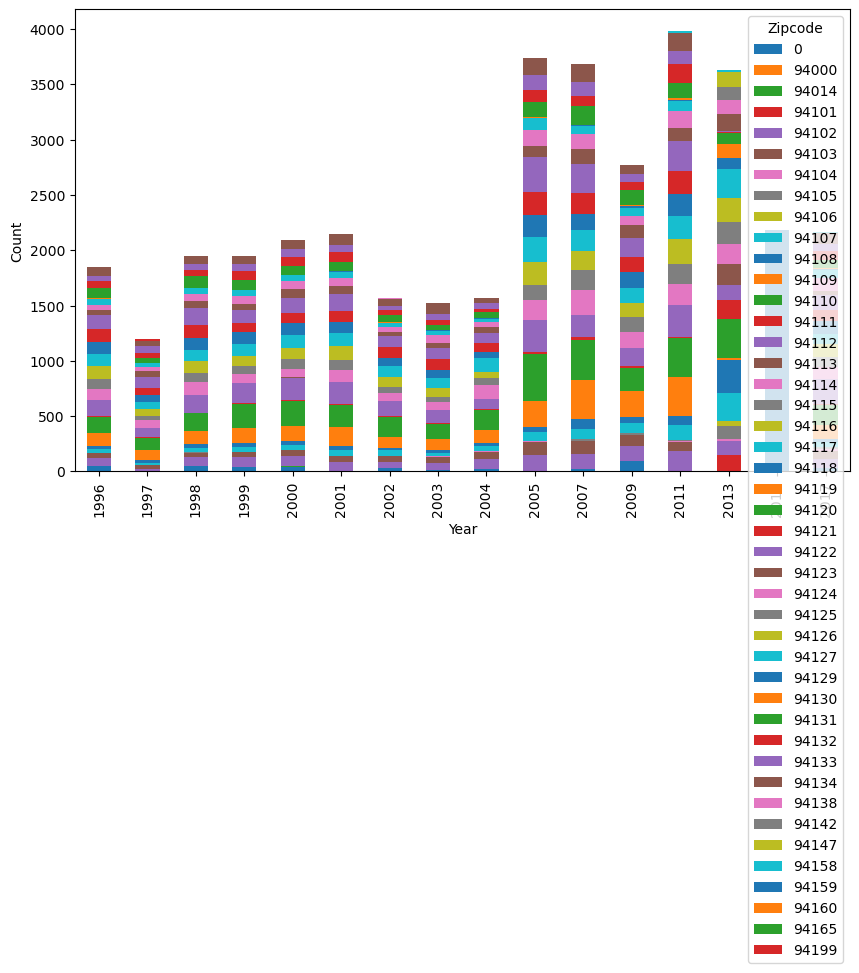

In [218]:
import matplotlib.pyplot as plt

# group the data by year and zipcode and count the occurrences
grouped = df_cleaned.groupby(['year', 'zipcode']).size().unstack()

# plot a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend(title='Zipcode', loc='upper right')
plt.show()

In [219]:
xls = pd.ExcelFile('City Survey Master Data 1996-2019.xlsx')
df1 = pd.read_excel(xls, 'Historical Data')
#df2 = pd.read_excel(xls, 'Sheet2')
columns = [ "year", "dem_zip", "dem_district", "inf_clean", "inf_stcond", "inf_sidecond", "inf_clean_side", "inf_clean_st", "safe_day", "safe_night", "dem_hhsize"]

In [232]:
dfagg = df1[columns]
dfagg[["inf_clean", "inf_stcond", "inf_sidecond", "inf_clean_side", "inf_clean_st"]].value_counts

<bound method DataFrame.value_counts of        inf_clean  inf_stcond  inf_sidecond  inf_clean_side  inf_clean_st
0            3.0         3.0           4.0             NaN           NaN
1            4.0         4.0           4.0             NaN           NaN
2            2.0         4.0           5.0             NaN           NaN
3            3.0         3.0           3.0             NaN           NaN
4            5.0         5.0           5.0             NaN           NaN
...          ...         ...           ...             ...           ...
40185        NaN         NaN           NaN             NaN           NaN
40186        NaN         NaN           NaN             NaN           NaN
40187        NaN         NaN           NaN             NaN           NaN
40188        NaN         NaN           NaN             NaN           NaN
40189        NaN         NaN           NaN             NaN           NaN

[40190 rows x 5 columns]>

In [233]:
# select the relevant columns and map the ratings to numeric values
relevant_columns = ["inf_clean", "inf_stcond", "inf_sidecond", "inf_clean_side", "inf_clean_st"]
rating_map = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
}
dfagg[relevant_columns] = dfagg[relevant_columns].replace(rating_map)

# exclude missing values and columns with ratings of 6 or 7
valid_columns = ["inf_clean", "inf_stcond", "inf_sidecond", "inf_clean_side", "inf_clean_st"]
# convert the ratings to numeric values and replace non-integer values with NaN
dfagg[relevant_columns] = dfagg[relevant_columns].applymap(lambda x: pd.to_numeric(x, errors='coerce'))

# compute the mean for each row, excluding NaN values
dfagg['cleanliness'] = dfagg[relevant_columns].mean(axis=1, skipna=True)

# print the result
dfagg['cleanliness'].value_counts()

/var/folders/cb/b43gvslj4f7b_st3sl96fjy40000gn/T/ipykernel_50704/1706580365.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfagg[relevant_columns] = dfagg[relevant_columns].replace(rating_map)
/var/folders/cb/b43gvslj4f7b_st3sl96fjy40000gn/T/ipykernel_50704/1706580365.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfagg[relevant_columns] = dfagg[relevant_columns].applymap(lambda x: pd.to_numeric(x, errors='coerce'))
/var/folders/cb/b43gvslj4f7b_st3sl96fjy40000gn/T/ipykernel_50704/1706580365.py:1

4.000000    5615
3.000000    5083
3.666667    2594
3.333333    2474
2.000000    2163
2.666667    1885
2.333333    1389
5.000000    1299
3.500000    1233
4.333333    1051
1.000000     906
2.500000     871
4.666667     794
1.666667     647
3.750000     438
3.250000     387
1.333333     362
4.500000     356
2.750000     356
4.250000     256
1.500000     223
2.250000     209
4.750000     147
1.750000      91
1.250000      33
Name: cleanliness, dtype: int64

In [234]:
dfagg = dfagg.drop(relevant_columns, axis=1)



In [235]:
df2019_cleaned = dfagg.rename(columns={"dem_zip":"zipcode", "dem_district": "district","dem_hhsize":"household_size"})

df2019_cleaned

,year,zipcode,district,safe_day,safe_night,household_size,cleanliness
0,2019,94112.0,11.0,4.0,2.0,6.0,3.333333
1,2019,99999.0,4.0,4.0,2.0,1.0,4.000000
2,2019,99999.0,NaN,5.0,2.0,2.0,3.666667
3,2019,99999.0,4.0,4.0,3.0,6.0,3.000000
4,2019,94132.0,7.0,4.0,3.0,3.0,5.000000
...,...,...,...,...,...,...,...
40185,1996,94116.0,NaN,3.0,3.0,3.0,NaN
40186,1996,94134.0,NaN,4.0,3.0,3.0,NaN
40187,1996,94112.0,NaN,4.0,4.0,4.0,NaN
40188,1996,94118.0,NaN,1.0,1.0,5.0,NaN


In [240]:
df2019_cleaned['zipcode'] = df2019_cleaned['zipcode'].fillna(0).astype(int)
df2019_cleaned['zipcode'] = df2019_cleaned['zipcode'].replace([88888, 99999], 0)
#df_cleaned['zipcode'] = df_cleaned['zipcode'].replace([88888, 99999], 0)

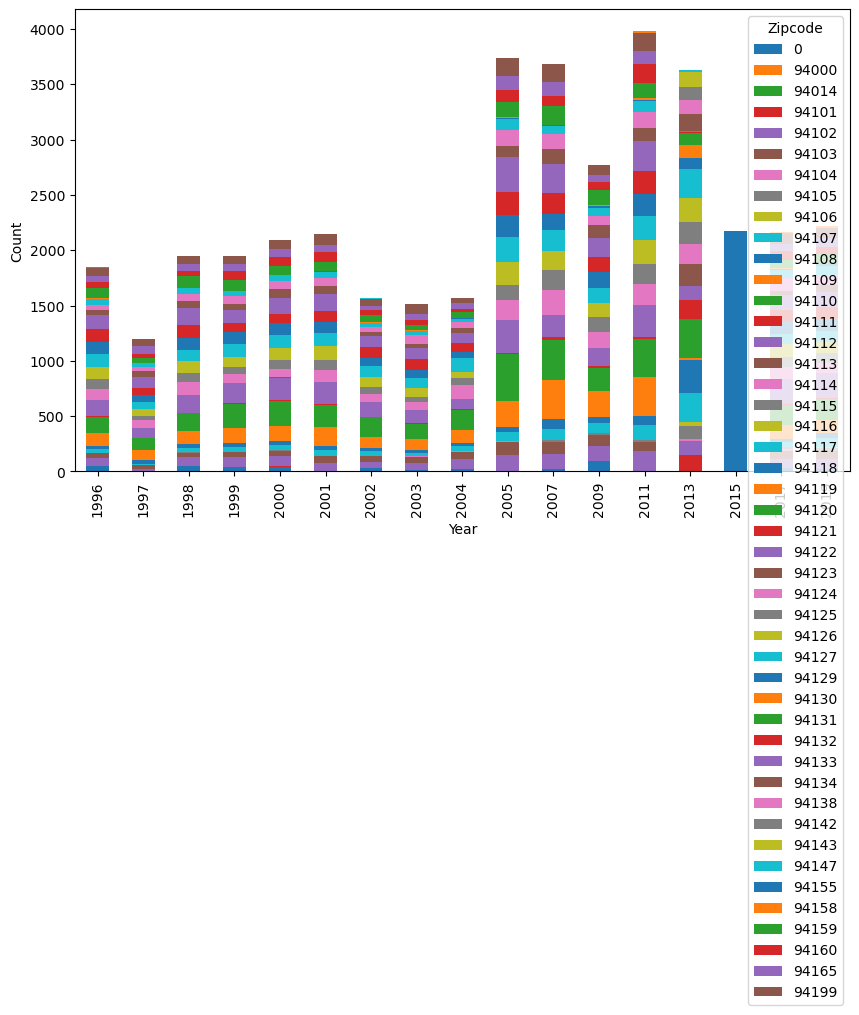

In [241]:
# group the data by year and zipcode and count the occurrences
grouped = df2019_cleaned.groupby(['year', 'zipcode']).size().unstack()

# plot a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend(title='Zipcode', loc='upper right')
plt.show()

In [246]:
df2019_cleaned.to_csv('citysurvey1996-2019_cleaned.csv', index=False)

In [247]:
x = pd.read_csv('df2019_cleaned.csv')
x

,year,zipcode,district,safe_day,safe_night,household_size,cleanliness
0,2019,94112,11.0,4.0,2.0,6.0,3.333333
1,2019,0,4.0,4.0,2.0,1.0,4.000000
2,2019,0,NaN,5.0,2.0,2.0,3.666667
3,2019,0,4.0,4.0,3.0,6.0,3.000000
4,2019,94132,7.0,4.0,3.0,3.0,5.000000
...,...,...,...,...,...,...,...
40185,1996,94116,NaN,3.0,3.0,3.0,NaN
40186,1996,94134,NaN,4.0,3.0,3.0,NaN
40187,1996,94112,NaN,4.0,4.0,4.0,NaN
40188,1996,94118,NaN,1.0,1.0,5.0,NaN
